# Case Study - Telecom Churn

__Submitted by:__ Janarthanan Balasubramanian

__Client:__ Leading Telecom Firm operating in Indian and Southeast Asian market

__Problem Statement:__ In the telecom industry, there are multiple service providers. Customers actively switch from one operator to another. The cost of acquiring a new customer is 5-10 times more than the cost of retaining an existing one. So customer retention is more important than customer acquisition. The telecommunications industry experiences an average of 15-25% annual churn rate. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

__Objective:__ The objective is to build a model to identify the high-value customers at high risk of churn and identify the main indicators of churn. In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

__Data Set:__ The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. We have to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

---

__A note on the Payment Model:__ In telecom industry, there are two main payment models: postpaid and prepaid. The customers in the postpaid model usually inform the operator to terminate the services before switching to another operator. But, in the prepaid model, the customer can simply stop using the services without any notice. It is hard to know whether it is an actual churn or a temporary suspension. Prepaid model is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America. So it is important to define what a churn is.

__How to define a churn?__ There are various ways to define churn.

 - __Revenue-based churn:__ Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’. The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.
 - __Usage-based churn:__ Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, we will use the usage-based definition to define churn.

__Understanding the Customer Behaviour:__ Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

 - __The ‘good’ phase:__ In this phase, the customer is happy with the service and behaves as usual.
 - __The ‘action’ phase:__ The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)
 - __The ‘churn’ phase:__ In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.
 
---

In [1]:
%%html
<style> table {float:left} </style>

|Acronymns|Descriptions|
|:---|:---|
|MOBILE_NUMBER|Customer phone number|
|CIRCLE_ID|Telecom circle area to which the customer belongs to|
|LOC|Local calls - within same telecom circle|
|STD|STD calls - outside the calling circle|
|IC|Incoming calls|
|OG|Outgoing calls|
|T2T|Operator T to T, i.e. within same operator (mobile to mobile)|
|T2M|Operator T to other operator mobile|
|T2O|Operator T to other operator fixed line|
|T2F|Operator T to fixed lines of T|
|T2C|Operator T to it’s own call center|
|ARPU|Average revenue per user|
|MOU|Minutes of usage - voice calls|
|AON|Age on network - number of days the customer is using the operator T network|
|ONNET|All kind of calls within the same operator network|
|OFFNET|All kind of calls outside the operator T network|
|ROAM|Indicates that customer is in roaming zone during the call|
|SPL|Special calls|
|ISD|ISD calls|
|RECH|Recharge|
|NUM|Number|
|AMT|Amount in local currency|
|MAX|Maximum|
|DATA|Mobile internet|
|3G|3G network|
|AV|Average|
|VOL|Mobile internet usage volume (in MB)|
|2G|2G network|
|PCK|Prepaid service schemes called - PACKS|
|NIGHT|Scheme to use during specific night hours only|
|MONTHLY|Service schemes with validity equivalent to a month|
|SACHET|Service schemes with validity smaller than a month|
|*.6|KPI for the month of June|
|*.7|KPI for the month of July|
|*.8|KPI for the month of August|
|*.9|KPI for the month of September|
|FB_USER|Service scheme to avail services of Facebook and similar social networking sites|
|VBC|Volume based cost - when no specific scheme is not purchased and paid as per usage|

---

## Approach:

 1. Data Preprocessing: 
    - Get the data for high value customers
    - Tag the Churn based on 9th Month Data
    - Handle Null Values - Drop the column or Impute with Mean or Median
    - Convert non-numeric columns to numeric columns 
 2. Exploratory analysis
 3. Feature Engineering
 4. Principal Component Analysis
 5. Model Building
 6. Model Evaluation
 7. Model Selection
 8. Predicting the Churn
 9. Identifying Predictor Variables
 10. Recommend Strategies
 
---

In [2]:
import os
import random as rd

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_path = os.getcwd()

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.rcParams.update(plt.rcParamsDefault)

In [5]:
sns.set()

In [6]:
data = pd.read_csv(data_path + '\\telecom_churn_data.csv', encoding = "ISO-8859-1")

In [7]:
# check the shape of the data set (number of rows and columns)

print('Number of rows: ', data.shape[0])
print('Number of cols: ', data.shape[1])

Number of rows:  99999
Number of cols:  226


## 1. Data Preprocessing

In this step we will do the preprocessing of the data: 

 - filter the high value customer data (we are focusing only on high value customers)
 - tag the churners (0 or 1 based on the 9th month behavior)
 - handle null and missing values (drop the column or impute with mean or median)
 - convert non-columns to numeric (non-numeric columns cannot be used for model building)

### 1.1. Get the Data for High Valued Customers

The objective in this assignment is to build a model to identify the high-value customers at high risk of churn and identify the main indicators of churn. We are going to predict the churn only on high-value customers. 

__Who is a high-value customer?__ Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). After filtering the high-value customers, you should get about 29.9k rows.

In [8]:
data[[colname for colname in list(data.columns) if 'rech' in colname]].head()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
1,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN
2,5,4,2,7,168,315,116,358,86,200,86,100,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0
3,10,11,18,14,230,310,601,410,60,50,50,50,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6,3,4,196,350,287,200,56,110,110,50,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN


In [9]:
# Derived Feature - Average Recharge Amount in first two months (good phase)

data['total_rech_data_amt_6'] = data['total_rech_data_6'].fillna(0) * data['av_rech_amt_data_6'].fillna(0)
data['total_rech_data_amt_7'] = data['total_rech_data_7'].fillna(0) * data['av_rech_amt_data_7'].fillna(0)
data['total_rech_data_amt_8'] = data['total_rech_data_8'].fillna(0) * data['av_rech_amt_data_8'].fillna(0)
data['total_rech_data_amt_9'] = data['total_rech_data_9'].fillna(0) * data['av_rech_amt_data_9'].fillna(0)

In [10]:
data.drop(columns = ['total_rech_data_6', 'av_rech_amt_data_6',
                     'total_rech_data_7', 'av_rech_amt_data_7',
                     'total_rech_data_8', 'av_rech_amt_data_8',
                     'total_rech_data_9', 'av_rech_amt_data_9'], inplace = True)

In [11]:
data['avg_rech_6_7'] = ((data['total_rech_amt_6'] + data['total_rech_data_amt_6']) + 
                        (data['total_rech_amt_7'] + data['total_rech_data_amt_7'])) / 2 

In [12]:
data['avg_rech_6_7'].quantile(q = 0.7)

478.0

In [13]:
hvc = data[data['avg_rech_6_7'] >= data['avg_rech_6_7'].quantile(q = 0.7)]

In [14]:
# since we have filtered the high valued customers, we can drop the derived column used for it

hvc.drop(columns = ['avg_rech_6_7'], inplace = True)

In [15]:
# check the shape of the data set (number of rows and columns)

print('Number of rows: ', hvc.shape[0])
print('Number of cols: ', hvc.shape[1])

Number of rows:  30001
Number of cols:  222


### 1.2. Tag the Churners

We will tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not
 - made any calls (either incoming or outgoing) - total_ic_mou_9 & total_og_mou_9 AND 
 - not used mobile internet even once in the churn phase. vol_2g_mb_9 & vol_3g_mb_9

After tagging churners, we will remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’ etc. in their names).

In [16]:
# the four features to determine the churn

cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

In [17]:
# check whether there are any null values in these four features

hvc[cols].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [18]:
# tagging the churners

hvc['churn'] = 0

hvc.loc[(hvc['total_ic_mou_9'] == 0) &
        (hvc['total_og_mou_9'] == 0) &
        (hvc['vol_2g_mb_9']    == 0) &
        (hvc['vol_3g_mb_9']    == 0), 'churn'] = 1 

In [19]:
hvc['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [20]:
# rename the columns as per the convention

hvc.rename(columns = {'jun_vbc_3g': 'vbc_3g_6', 
                      'jul_vbc_3g': 'vbc_3g_7', 
                      'aug_vbc_3g': 'vbc_3g_8', 
                      'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [21]:
# Remove attributes corresponding to churn phase

hvc.drop(columns = [colname for colname in list(hvc.columns) if '_9' in colname], inplace = True)

In [22]:
# check the shape of the data set (number of rows and columns)

print('Number of rows: ', hvc.shape[0])
print('Number of cols: ', hvc.shape[1])

Number of rows:  30001
Number of cols:  169


### 1.3. Handling Date Columns

In [23]:
datecols = [colname for colname in list(hvc.columns) if 'date' in colname]

In [24]:
hvc[datecols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 9 columns):
last_date_of_month_6        30001 non-null object
last_date_of_month_7        29974 non-null object
last_date_of_month_8        29836 non-null object
date_of_last_rech_6         29928 non-null object
date_of_last_rech_7         29903 non-null object
date_of_last_rech_8         29418 non-null object
date_of_last_rech_data_6    16756 non-null object
date_of_last_rech_data_7    17057 non-null object
date_of_last_rech_data_8    15953 non-null object
dtypes: object(9)
memory usage: 2.3+ MB


In [25]:
hvc[datecols].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
7,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
21,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
23,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/7/2014,8/24/2014,NaN,7/7/2014,8/6/2014


In [26]:
hvc['last_date_of_month_6'] = hvc['last_date_of_month_6'].fillna('6/30/2014')
hvc['last_date_of_month_7'] = hvc['last_date_of_month_7'].fillna('7/31/2014')
hvc['last_date_of_month_8'] = hvc['last_date_of_month_8'].fillna('8/31/2014')

In [27]:
# the dates are stored as string; let us convert into dates

for col in datecols: hvc[col] = pd.to_datetime(hvc[col])

In [28]:
hvc[datecols].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-30,2014-07-31,2014-08-31,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
7,2014-06-30,2014-07-31,2014-08-31,2014-06-27,2014-07-25,2014-08-26,NaT,NaT,NaT
8,2014-06-30,2014-07-31,2014-08-31,2014-06-25,2014-07-31,2014-08-30,NaT,2014-07-31,2014-08-23
21,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-31,2014-08-31,NaT,NaT,NaT
23,2014-06-30,2014-07-31,2014-08-31,2014-06-18,2014-07-07,2014-08-24,NaT,2014-07-07,2014-08-06


Let us convert these into numeric value by creating a derived field how many days beore the last date of the month did the customer do the last recharge. If the date of last recharge is null, it means that the customer did not recharge and so we can use 0.

In [29]:
# create columns with only the day of recharge

hvc['last_rech_6'] = hvc['date_of_last_rech_6'].dt.day
hvc['last_rech_7'] = hvc['date_of_last_rech_7'].dt.day
hvc['last_rech_8'] = hvc['date_of_last_rech_8'].dt.day

hvc['last_rech_data_6'] = hvc['date_of_last_rech_data_6'].dt.day
hvc['last_rech_data_7'] = hvc['date_of_last_rech_data_7'].dt.day
hvc['last_rech_data_8'] = hvc['date_of_last_rech_data_8'].dt.day

In [30]:
daycols = ['last_rech_6', 'last_rech_7', 'last_rech_8', 'last_rech_data_6', 'last_rech_data_7', 'last_rech_data_8']

In [31]:
# impute null values with 0 - indicates that the customer did not recharge

hvc[daycols] = hvc[daycols].fillna(0).astype('int')

In [32]:
# drop the date columns

hvc.drop(columns = datecols, inplace = True)

### 1.4. Columns without Variability

We can drop the variables without any variability i.e. all observations has the same value for that variable.

In [33]:
# check data type, unique values, null values and null percentage

stats = pd.concat([pd.DataFrame(hvc.dtypes), 
                   pd.DataFrame(hvc.nunique()), 
                   pd.DataFrame(hvc.isnull().sum()),
                   pd.DataFrame(round(100 * (hvc.isnull().sum() / len(hvc.index)), 2))], axis = 1).reset_index()

stats.columns = ['Variable', 'Data Type', 'Unique Values', 'Null Values', 'Null Percentage']

In [34]:
stats[stats['Unique Values'] == 1]

,Variable,Data Type,Unique Values,Null Values,Null Percentage
1,circle_id,int64,1,0,0.00
2,loc_og_t2o_mou,float64,1,224,0.75
3,std_og_t2o_mou,float64,1,224,0.75
4,loc_ic_t2o_mou,float64,1,224,0.75
44,std_og_t2c_mou_6,float64,1,545,1.82
45,std_og_t2c_mou_7,float64,1,537,1.79
46,std_og_t2c_mou_8,float64,1,1174,3.91
83,std_ic_t2o_mou_6,float64,1,545,1.82
84,std_ic_t2o_mou_7,float64,1,537,1.79
85,std_ic_t2o_mou_8,float64,1,1174,3.91


In [35]:
cols_without_variability = list(stats[stats['Unique Values'] == 1]['Variable'])

In [36]:
hvc.drop(columns = cols_without_variability, inplace = True)

### 1.5. Handling Null and Missing Values

In [37]:
# check data type, unique values, null values and null percentage

stats = pd.concat([pd.DataFrame(hvc.dtypes), 
                   pd.DataFrame(hvc.nunique()), 
                   pd.DataFrame(hvc.isnull().sum()),
                   pd.DataFrame(round(100 * (hvc.isnull().sum() / len(hvc.index)), 2))], axis = 1).reset_index()

stats.columns = ['Variable', 'Data Type', 'Unique Values', 'Null Values', 'Null Percentage']

In [38]:
nulls = stats[stats['Null Percentage'] > 0].sort_values(by = 'Variable', ascending = False)

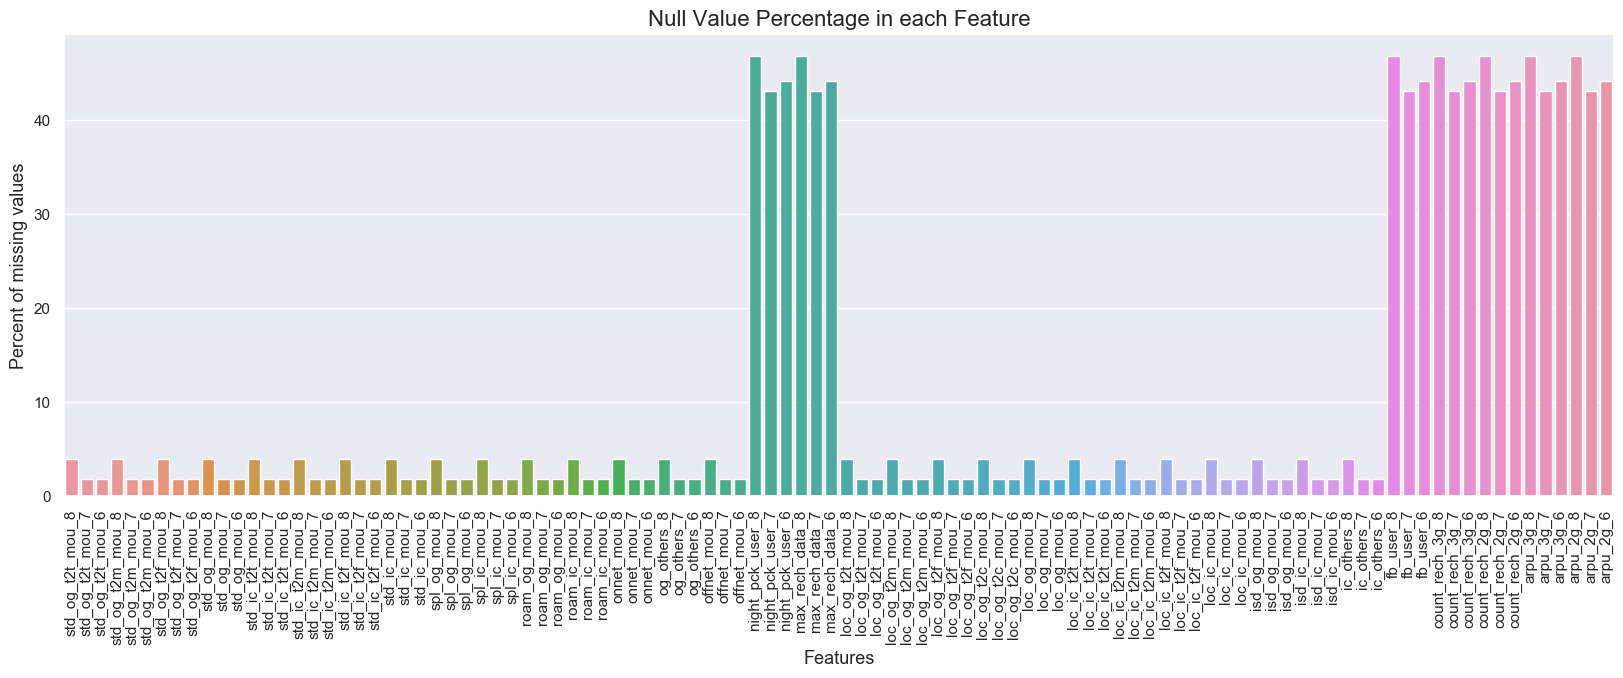

In [39]:
f, ax = plt.subplots(figsize = (20, 6))
plt.xticks(rotation='90')
sns.barplot(data = nulls, x = 'Variable', y = 'Null Percentage')
plt.xlabel('Features', fontsize = 13)
plt.ylabel('Percent of missing values', fontsize = 13)
plt.title('Null Value Percentage in each Feature', fontsize = 16)
plt.show()

### Minutes of Usage (MOU)

**IC stands for incoming call usage and OG stands for outgoing call usage. MOU stands for minutes of usage. The null values correspond to the service not being used and can be imputed with 0.**

In [40]:
mou_cols = list(stats[stats['Variable'].str.contains('mou')]['Variable'])

In [41]:
mou_cols.extend(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', ])

In [42]:
hvc[mou_cols] = hvc[mou_cols].fillna(0)

The minutes of usage fields can be validated as follows (m stands for month and can be substituted with 6, 7, or 8):

```(1) loc_og_mou_m = loc_og_t2t_mou_m + loc_og_t2m_mou_m + loc_og_t2f_mou_m```

```(2) std_og_mou_m = std_og_t2t_mou_m + std_og_t2m_mou_m + std_og_t2f_mou_m```

```(3) loc_ic_mou_m = loc_ic_t2t_mou_m + loc_ic_t2m_mou_m + loc_ic_t2f_mou_m```

```(4) std_ic_mou_m = std_ic_t2t_mou_m + std_ic_t2m_mou_m + std_ic_t2f_mou_m```

```(5) total_og_mou_m = loc_og_mou_m + std_og_mou_m + isd_og_mou_m + spl_og_mou_m + og_others_m```

```(6) total_ic_mou_m = loc_ic_mou_m + std_ic_mou_m + spl_ic_mou_m + isd_ic_mou_m + ic_others_m```

We will check the number of records for which LHS - RHS ! = 0. We should get 0 rows that violates the equation.

In [43]:
# validating based on the above equations for the month of June

print('For the month of June: ')

print('Rows violating equation 1: ', hvc[round(hvc['loc_og_t2t_mou_6'] + hvc['loc_og_t2m_mou_6'] + hvc['loc_og_t2f_mou_6'] - hvc['loc_og_mou_6'], 0) != 0].shape[0])
print('Rows violating equation 2: ', hvc[round(hvc['std_og_t2t_mou_6'] + hvc['std_og_t2m_mou_6'] + hvc['std_og_t2f_mou_6'] - hvc['std_og_mou_6'], 0) != 0].shape[0])
print('Rows violating equation 3: ', hvc[round(hvc['loc_ic_t2t_mou_6'] + hvc['loc_ic_t2m_mou_6'] + hvc['loc_ic_t2f_mou_6'] - hvc['loc_ic_mou_6'], 0) != 0].shape[0])
print('Rows violating equation 4: ', hvc[round(hvc['std_ic_t2t_mou_6'] + hvc['std_ic_t2m_mou_6'] + hvc['std_ic_t2f_mou_6'] - hvc['std_ic_mou_6'], 0) != 0].shape[0])

print('Rows violating equation 5: ', hvc[round(hvc['loc_og_mou_6'] + hvc['std_og_mou_6'] + hvc['isd_og_mou_6'] + hvc['spl_og_mou_6'] + hvc['og_others_6'] - hvc['total_og_mou_6'], 0) != 0].shape[0])
print('Rows violating equation 6: ', hvc[round(hvc['loc_ic_mou_6'] + hvc['std_ic_mou_6'] + hvc['isd_ic_mou_6'] + hvc['spl_ic_mou_6'] + hvc['ic_others_6'] - hvc['total_ic_mou_6'], 0) != 0].shape[0])

print()

# validating based on the above equations for the month of July

print('For the month of July: ')

print('Rows violating equation 1: ', hvc[round(hvc['loc_og_t2t_mou_7'] + hvc['loc_og_t2m_mou_7'] + hvc['loc_og_t2f_mou_7'] - hvc['loc_og_mou_7'], 0) != 0].shape[0])
print('Rows violating equation 2: ', hvc[round(hvc['std_og_t2t_mou_7'] + hvc['std_og_t2m_mou_7'] + hvc['std_og_t2f_mou_7'] - hvc['std_og_mou_7'], 0) != 0].shape[0])
print('Rows violating equation 3: ', hvc[round(hvc['loc_ic_t2t_mou_7'] + hvc['loc_ic_t2m_mou_7'] + hvc['loc_ic_t2f_mou_7'] - hvc['loc_ic_mou_7'], 0) != 0].shape[0])
print('Rows violating equation 4: ', hvc[round(hvc['std_ic_t2t_mou_7'] + hvc['std_ic_t2m_mou_7'] + hvc['std_ic_t2f_mou_7'] - hvc['std_ic_mou_7'], 0) != 0].shape[0])

print('Rows violating equation 5: ', hvc[round(hvc['loc_og_mou_7'] + hvc['std_og_mou_7'] + hvc['isd_og_mou_7'] + hvc['spl_og_mou_7'] + hvc['og_others_7'] - hvc['total_og_mou_7'], 0) != 0].shape[0])
print('Rows violating equation 6: ', hvc[round(hvc['loc_ic_mou_7'] + hvc['std_ic_mou_7'] + hvc['isd_ic_mou_7'] + hvc['spl_ic_mou_7'] + hvc['ic_others_7'] - hvc['total_ic_mou_7'], 0) != 0].shape[0])

print()

# validating based on the above equations for the month of August

print('For the month of August: ')

print('Rows violating equation 1: ', hvc[round(hvc['loc_og_t2t_mou_8'] + hvc['loc_og_t2m_mou_8'] + hvc['loc_og_t2f_mou_8'] - hvc['loc_og_mou_8'], 0) != 0].shape[0])
print('Rows violating equation 2: ', hvc[round(hvc['std_og_t2t_mou_8'] + hvc['std_og_t2m_mou_8'] + hvc['std_og_t2f_mou_8'] - hvc['std_og_mou_8'], 0) != 0].shape[0])
print('Rows violating equation 3: ', hvc[round(hvc['loc_ic_t2t_mou_8'] + hvc['loc_ic_t2m_mou_8'] + hvc['loc_ic_t2f_mou_8'] - hvc['loc_ic_mou_8'], 0) != 0].shape[0])
print('Rows violating equation 4: ', hvc[round(hvc['std_ic_t2t_mou_8'] + hvc['std_ic_t2m_mou_8'] + hvc['std_ic_t2f_mou_8'] - hvc['std_ic_mou_8'], 0) != 0].shape[0])

print('Rows violating equation 5: ', hvc[round(hvc['loc_og_mou_8'] + hvc['std_og_mou_8'] + hvc['isd_og_mou_8'] + hvc['spl_og_mou_8'] + hvc['og_others_8'] - hvc['total_og_mou_8'], 0) != 0].shape[0])
print('Rows violating equation 6: ', hvc[round(hvc['loc_ic_mou_8'] + hvc['std_ic_mou_8'] + hvc['isd_ic_mou_8'] + hvc['spl_ic_mou_8'] + hvc['ic_others_8'] - hvc['total_ic_mou_8'], 0) != 0].shape[0])

For the month of June: 
Rows violating equation 1:  0
Rows violating equation 2:  0
Rows violating equation 3:  0
Rows violating equation 4:  0
Rows violating equation 5:  0
Rows violating equation 6:  0

For the month of July: 
Rows violating equation 1:  0
Rows violating equation 2:  0
Rows violating equation 3:  0
Rows violating equation 4:  0
Rows violating equation 5:  0
Rows violating equation 6:  0

For the month of August: 
Rows violating equation 1:  0
Rows violating equation 2:  0
Rows violating equation 3:  0
Rows violating equation 4:  0
Rows violating equation 5:  0
Rows violating equation 6:  0


So, we can conclude that imputing with 0 is the right decision.

**The features that can be expressed in terms of other features can be dropped to avoid multicollinearity.**

In [44]:
dependentcols = ['loc_og_mou_6', 'std_og_mou_6', 'loc_ic_mou_6', 'std_ic_mou_6', 'total_og_mou_6', 'total_ic_mou_6',
                 'loc_og_mou_7', 'std_og_mou_7', 'loc_ic_mou_7', 'std_ic_mou_7', 'total_og_mou_7', 'total_ic_mou_7',
                 'loc_og_mou_8', 'std_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_og_mou_8', 'total_ic_mou_8']

In [45]:
hvc.drop(columns = dependentcols, inplace = True)

### Recharge Amount

**RECH stands for recharge. Null in recharge amount means that the customer did not recharge. So the null values can be imputed with 0.**

In [46]:
rech_cols = list(stats[(stats['Variable'].str.contains('rech')) &
                       (~stats['Variable'].str.contains('date'))]['Variable'])

In [47]:
hvc[rech_cols] = hvc[rech_cols].fillna(0)

**ARPU stands for average revenue per user. A null value indicates that there is no revenue and hence, can be imputed with 0.**

In [48]:
arpu_cols = list(stats[stats['Variable'].str.contains('arpu')]['Variable'])

In [49]:
hvc[arpu_cols] = hvc[arpu_cols].fillna(0)

**Null values in NIGHT PACKS and FB_USER indicates that the user is not using that service and can be updated as 0.**

In [50]:
cols_usage = ['night_pck_user_6', 'fb_user_6', 'night_pck_user_7', 'fb_user_7', 'night_pck_user_8', 'fb_user_8']

In [51]:
hvc[cols_usage] = hvc[cols_usage].fillna(0)

**Let us see whether there are any null values in the dataset.**

In [52]:
hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 138 entries, mobile_number to last_rech_data_8
dtypes: float64(105), int32(6), int64(27)
memory usage: 31.1 MB


### 1.6. Check for Multicollinearity

In [53]:
%matplotlib inline

In [54]:
corr = hvc.corr()

(137.0, 0.0)

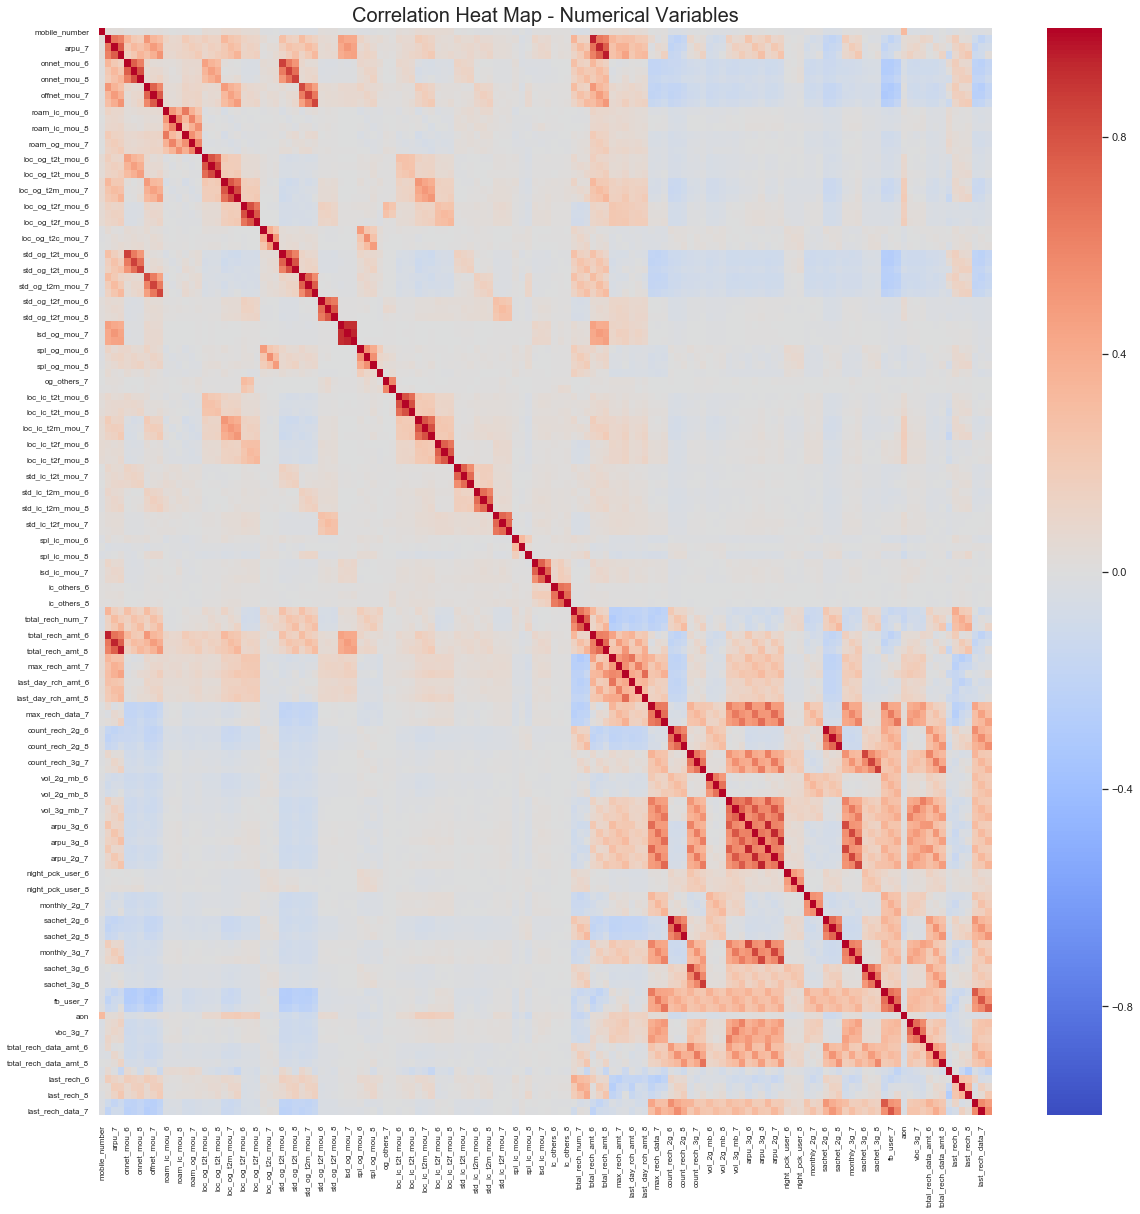

In [55]:
# plot correlation heat map for numeric variables

f, ax = plt.subplots(figsize=(20, 20))

heatmap = sns.heatmap(corr, vmin = -1, vmax = 1, cmap = "coolwarm", annot = False, annot_kws = {"size": 8})

heatmap.set_yticklabels(heatmap.get_yticklabels(), size = 8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size = 8)

# add title to the plot
ax.set_title('Correlation Heat Map - Numerical Variables', fontsize = 20)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# due to a bug in seaborn the first and last row square are getting cut in half - the following code fixes it
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

### Timesheet

|Date|From|To|Minutes|Remarks|Sections|
|:---|:---|:---|---:|:---|:---|
|19-05-2020|1:30 AM|3:30 AM|120|Introductory Notes & Data Preprocessing|0, 1.1, 1.2|
|25-05-2020|12:30 AM|4:00 AM|210|Data Preprocessing|1.3, 1.4, 1.5|

In [56]:
hvc.columns.tolist()

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'lo

In [57]:
high_value_cust=hvc

In [58]:
high_value_cust.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,last_rech_6,last_rech_7,last_rech_8,last_rech_data_6,last_rech_data_7,last_rech_data_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1,21,16,8,21,16,8
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1,27,25,26,0,0,0
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0.0,354.0,207.0,0,25,31,30,0,31,23
21,7002124215,514.453,597.753,637.760,102.

### Dimensionality Reduction Using PCA :

In [62]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = high_value_cust.drop(['churn'],axis=1)

# Putting response variable to y
y = high_value_cust['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [63]:
y.value_counts()/len(y.index)

0    0.918636
1    0.081364
Name: churn, dtype: float64

Since the percentage of churn is very low we need to handle class imbalance later while model building.

In [64]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [65]:
X_train.shape

(21000, 137)

In [66]:
X_train.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,last_rech_6,last_rech_7,last_rech_8,last_rech_data_6,last_rech_data_7,last_rech_data_8
39186,7001454064,1086.343,910.298,592.623,5.69,8.28,4.84,151.89,159.01,98.06,28.96,26.66,31.11,6.13,14.38,9.86,5.39,7.39,4.84,21.63,30.58,19.81,1.19,0.00,0.00,0.0,6.40,1.10,0.00,0.00,0.00,2.61,10.89,13.26,0.00,0.00,0.00,120.61,95.48,54.01,0.00,8.55,1.10,0.00,0.0,0.0,15.29,35.24,46.11,134.14,140.98,105.54,7.18,9.74,2.18,0.00,0.00,0.00,17.44,32.93,57.56,0.00,0.00,0.00,0.00,0.0,0.0,259.01,135.48,55.19,0.00,2.01,0.00,8,5,3,1481,892,658,398,459,229,398,35,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3651,0.00,0.00,0.00,0.0,0.0,0.0,23,22,29,0,0,0
39833,7001929370,513.359,311.602,364.126,144.89,49.84,40.71,321.14,227.63,265.41,0.00,0.00,0.00,0.00,0.00,0.00,64.46,30.58,40.71,277.44,179.54,211.56,12.14,5.18,34.54,0.0,16.51,0.00,80.43,19.26,0.00,31.54,19.59,19.29,0.00,6.78,0.00,0.00,0.00,0.00,0.00,16.51,0.00,0.00,0.0,0.0,27.43,21.46,36.66,143.86,204.43,242.16,91.86,57.33,13.73,15.63,14.01,0.00,29.08,28.99,22.28,35.48,3.90,0.00,0.00,0.0,0.0,52.03,10.75,5.64,7.06,1.38,0.18,8,7,5,576,393,488,110,120,130,110,98,130,98.0,98.0,98.0,2.0,3.0,1.0,0.0,0.0,0.0,10.09,143.24,338.96,345.17,144.03,171.28,15.21,12.0,0.0,0.50,0.60,0.01,0.0,0.0,0.0,0,0,0,2,3,1,0,0,0,0,0,0,1.0,1.0,1.0,2347,184.09,147.56,274.99,392.0,444.0,98.0,24,28,31,24,28,17
38778,7000952221,298.315,314.180,313.407,69.33,77.09,83.28,333.28,298.38,213.34,17.73,42.28,68.41,22.99,21.33,76.69,21.54,11.61,26.54,210.16,218.54,127.33,3.13,6.98,0.00,0.0,0.00,0.00,43.54,61.19,27.16,101.21,55.79,38.88,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.0,0.0,16.94,27.19,46.71,84.51,141.73,148.01,0.01,0.00,4.74,9.73,7.38,32.43,23.16,36.14,37.18,0.00,0.00,0.00,0.00,0.0,0.0,0.00,13.76,13.33,0.00,0.00,12.88,8,9,10,375,357,360,128,120,130,30,30,30,23.0,23.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.09,0.14,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.06,0.06,0.00,0.0,0.0,0.0,0,0,0,1,4,0,0,0,0,0,0,0,1.0,1.0,0.0,3289,0.00,0.00,0.00,23.0,368.0,0.0,30,29,23,25,25,0
43026,7000752154,12

In [67]:
X_test.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,last_rech_6,last_rech_7,last_rech_8,last_rech_data_6,last_rech_data_7,last_rech_data_8
20296,7000912554,539.240,537.575,281.034,15.91,5.51,7.99,54.24,14.86,22.36,0.00,0.0,0.00,0.00,0.00,0.00,3.51,3.21,7.99,44.98,4.41,13.99,3.58,1.51,1.69,0.03,0.00,0.00,12.39,2.30,0.00,4.66,8.93,5.74,0.98,0.00,0.91,0.0,0.0,0.0,1.28,3.39,3.09,0.00,0.00,0.0,8.49,5.06,2.64,51.14,32.38,21.04,8.78,15.51,22.96,28.44,0.00,0.00,8.01,1.69,3.64,5.46,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,12,11,4,710,747,302,120,150,144,30,150,144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,667,0.0,0.00,0.00,0.0,0.0,0.0,28,29,11,0,0,0
8279,7000409110,79.431,208.200,78.834,15.88,9.33,9.46,26.61,21.34,3.56,5.76,0.0,3.38,3.89,10.28,5.06,7.89,0.96,2.89,1.11,4.06,0.08,0.00,0.00,0.00,19.09,9.96,2.73,4.21,7.58,2.25,0.00,0.33,0.00,0.00,0.00,0.00,0.0,0.0,0.0,25.36,7.44,2.73,0.00,0.00,0.0,25.51,44.06,5.78,0.30,12.06,2.18,0.00,0.00,0.00,3.61,0.00,16.11,0.00,0.13,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5,17,7,74,250,80,30,25,30,17,14,0,17.0,25.0,25.0,2.0,9.0,2.0,0.0,0.0,1.0,168.60,297.22,174.63,0.00,0.00,0.0,0.00,0.00,21.91,13.09,33.20,28.91,0.0,0.0,0.0,0,0,0,2,9,2,0,0,0,0,0,1,1.0,1.0,1.0,731,0.0,0.00,0.00,68.0,1341.0,225.0,29,29,26,29,29,11
72269,7000903241,716.917,721.802,625.488,347.81,227.36,232.86,819.18,809.29,870.48,0.00,0.0,0.00,0.00,0.00,0.00,313.09,162.96,159.09,751.01,697.34,648.71,3.55,0.00,2.59,0.00,0.00,10.04,34.71,64.39,73.76,46.23,109.18,200.29,3.63,2.76,9.41,0.0,0.0,0.0,14.75,0.00,10.99,2.01,0.00,0.0,93.86,53.26,31.31,352.79,355.58,366.34,12.98,3.91,14.19,7.08,10.35,9.83,11.29,27.53,27.43,5.73,2.20,10.34,0.00,0.0,0.0,0.00,0.00,0.23,0.39,0.56,0.09,12,8,8,937,814,763,128,179,169,128,169,130,49.0,179.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.88,0.13,0.00,401.63,1865.55,0.0,230.29,267.12,0.00,76.82,199.67,0.00,0.0,1.0,0.0,0,0,0,0,0,0,0,1,0,2,1,0,1.0,1.0,0.0,229,0.0,11.03,89.29,180.0,456.0,0.0,29,24,28,4,17,0
65602,7001270385,458.514,486.899,458.996,79.43,65.01,115.64,348.88,272.28,222.64,0.

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,last_rech_6,last_rech_7,last_rech_8,last_rech_data_6,last_rech_data_7,last_rech_data_8
0,0.363443,1.115484,0.688737,0.152667,-0.557530,-0.541565,-0.498528,-0.461376,-0.438796,-0.489079,0.166015,0.177751,0.252122,-0.178395,-0.062395,-0.095051,-0.347750,-0.323913,-0.316741,-0.562058,-0.545416,-0.560932,-0.227853,-0.290731,-0.304296,-0.254831,0.482122,-0.077536,-0.411127,-0.413976,-0.373254,-0.433396,-0.407680,-0.350559,-0.156374,-0.141659,-0.143638,2.238915,1.762919,0.997135,-0.326117,0.065368,-0.272720,-0.140957,-0.01516,-0.016828,-0.305558,-0.187825,-0.102345,-0.080491,-0.054874,-0.190812,-0.177672,-0.127684,-0.279557,-0.184858,-0.179917,-0.191835,-0.117328,0.019944,0.279901,-0.135600,-0.136123,-0.124243,-0.308577,-0.13577,-0.234992,3.273325,1.628862,0.689833,-0.074812,0.027293,-0.088662,-0.415802,-0.717597,-0.751786,1.415590,0.373331,0.109025,1.293454,1.573734,0.391372,2.047579,-0.456642,0.716280,-0.694135,-0.700252,-0.656217,-0.493257,-0.511751,-0.476808,-0.367574,-0.356341,-0.324914,-0.388365,-0.375952,-0.337356,-0.364613,-0.394511,-0.373871,-0.378436,-0.371852,-0.366982,-0.400634,-0.386089,-0.381471,-0.119364,-0.116668,-0.107747,-0.401189,-0.408175,-0.376513,-0.423358,-0.442850,-0.416085,-0.360796,-0.34396,-0.343262,-0.211037,-0.207517,-0.184095,-1.039741,-1.053123,-0.961411,2.582178,-0.401980,-0.400504,-0.382233,-0.364843,-0.356511,-0.275102,-0.697635,-1.073858,0.443044,-0.956754,-0.982414,-0.908515
1,1.051107,-0.096775,-0.500253,-0.275833,-0.252141,-0.454845,-0.420576,-0.109409,-0.302716,-0.143763,-0.211944,-0.168046,-0.169673,-0.232413,-0.211540,-0.192132,-0.090037,-0.228832,-0.162589,0.442672,0.066070,0.255949,0.253079,-0.057653,1.482865,-0.254831,1.558365,-0.224949,-0.209983,-0.368013,-0.373254,-0.361800,-0.387785,-0.335932,-0.156374,0.374211,-0.143638,-0.044048,-0.043860,-0.040774,-0.326117,0.425045,-0.327945,-0.140957,-0.01516,-0.016828,-0.232073,-0.269922,-0.160619,-0.037617,0.227862,0.434676,1.648758,0.845531,-0.014239,0.011290,-0.014902,-0.191835,-0.001636,-0.017817,-0.053103,1.591070,0.051326,-0.124243,-0.308577,-0.13577,-0.234992,0.546914,-0.009070,-0.07

In [69]:
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_test.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,last_rech_6,last_rech_7,last_rech_8,last_rech_data_6,last_rech_data_7,last_rech_data_8
0,-0.420003,-0.042018,-0.051478,-0.431655,-0.535108,-0.547345,-0.491683,-0.664447,-0.724659,-0.645281,-0.211944,-0.168046,-0.169673,-0.232413,-0.211540,-0.192132,-0.355952,-0.341051,-0.303204,-0.470348,-0.652844,-0.585726,-0.122882,-0.222788,-0.216853,-0.250072,-0.199179,-0.224949,-0.380142,-0.408487,-0.373254,-0.428322,-0.412162,-0.368801,-0.074142,-0.141659,-0.063738,-0.044048,-0.04386,-0.040774,-0.255155,-0.167790,-0.172815,-0.140957,-0.015160,-0.016828,-0.346720,-0.367628,-0.370407,-0.446593,-0.538801,-0.577679,-0.143162,-0.009688,0.197786,0.172048,-0.179917,-0.191835,-0.211054,-0.279464,-0.229044,0.130117,-0.136123,-0.124243,-0.308577,-0.13577,-0.234992,-0.138443,-0.150237,-0.159451,-0.074812,-0.086475,-0.088662,0.017540,-0.080537,-0.643976,0.083784,0.135773,-0.438870,-0.284615,-0.123992,-0.095029,-0.492729,0.336648,0.340926,-0.694135,-0.700252,-0.656217,-0.493257,-0.511751,-0.476808,-0.367574,-0.356341,-0.324914,-0.388365,-0.375952,-0.337356,-0.364613,-0.394511,-0.373871,-0.378436,-0.371852,-0.366982,-0.400634,-0.386089,-0.381471,-0.119364,-0.116668,-0.107747,-0.401189,-0.408175,-0.376513,-0.423358,-0.442850,-0.416085,-0.360796,-0.343960,-0.343262,-0.211037,-0.207517,-0.184095,-1.039741,-1.053123,-0.961411,-0.559188,-0.401980,-0.400504,-0.382233,-0.364843,-0.356511,-0.275102,0.332193,0.376621,-2.364980,-0.956754,-0.982414,-0.908515
1,-1.148376,-1.014833,-0.705605,-0.810840,-0.535174,-0.539374,-0.488488,-0.721905,-0.711808,-0.684073,-0.136770,-0.168046,-0.123846,-0.198134,-0.104919,-0.142312,-0.336843,-0.350276,-0.325121,-0.642654,-0.654281,-0.644984,-0.280118,-0.290731,-0.304296,2.773782,0.861096,0.140902,-0.400599,-0.395887,-0.367583,-0.439855,-0.431828,-0.382725,-0.156374,-0.141659,-0.143638,-0.044048,-0.04386,-0.040774,1.079826,0.015211,-0.190888,-0.140957,-0.015160,-0.016828,-0.243695,-0.135279,-0.351044,-0.670841,-0.629348,-0.664026,-0.332535,-0.326867,-0.329634,-0.139554,-0.179917,0.031474,-0.290667,-0.294415,-0.263402,-0.135600,-0.136123,-0.124243,-0.308577,-0.13577,-0.23

In [70]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [71]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [72]:
pca.components_

array([[-3.38378776e-03, -2.16289231e-03,  2.77111864e-03, ...,
         1.36023147e-01,  1.44776835e-01,  1.36660647e-01],
       [ 2.18164664e-02,  2.16199704e-01,  2.25939558e-01, ...,
        -1.04033292e-01, -1.04547123e-01, -7.52569741e-02],
       [-2.42904251e-02,  1.05697329e-01,  1.33280833e-01, ...,
         5.84311686e-02,  6.69011601e-02,  8.54641996e-02],
       ...,
       [ 0.00000000e+00, -1.52597559e-16,  8.99676808e-17, ...,
         5.60584535e-17, -7.64447379e-17,  6.90576973e-17],
       [ 0.00000000e+00,  2.04369702e-16,  2.76166554e-16, ...,
         1.13460331e-16,  7.91471875e-17,  7.63598377e-17],
       [-0.00000000e+00, -2.61974509e-16, -1.01548936e-16, ...,
        -5.77395761e-17,  2.80543177e-17, -8.86521938e-17]])

In [73]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.003384,0.021816,mobile_number
1,-0.002163,0.216200,arpu_6
2,0.002771,0.225940,arpu_7
3,0.013292,0.218924,arpu_8
4,-0.077204,0.083847,onnet_mou_6
5,-0.079154,0.090503,onnet_mou_7
6,-0.067489,0.094130,onnet_mou_8
7,-0.076338,0.148150,offnet_mou_6
8,-0.078219,0.154924,offnet_mou_7
9,-0.061973,0.152492,offnet_mou_8


In [74]:
pca.explained_variance_ratio_

array([1.09016753e-01, 8.08564907e-02, 5.43934649e-02, 4.18669836e-02,
       3.32397127e-02, 3.13068776e-02, 2.70669492e-02, 2.63245499e-02,
       2.36296162e-02, 2.17432823e-02, 2.06207974e-02, 1.99881610e-02,
       1.93461108e-02, 1.91766862e-02, 1.82365694e-02, 1.73792917e-02,
       1.62370011e-02, 1.46177579e-02, 1.40750076e-02, 1.35602219e-02,
       1.33586641e-02, 1.28964471e-02, 1.21219565e-02, 1.19552191e-02,
       1.15018341e-02, 1.13167868e-02, 1.11146147e-02, 1.01407325e-02,
       9.44935198e-03, 8.92489040e-03, 8.70422869e-03, 8.41527061e-03,
       7.89266644e-03, 7.66352606e-03, 7.53917755e-03, 7.16184585e-03,
       6.93126427e-03, 6.80960849e-03, 6.70689464e-03, 6.59124857e-03,
       6.39479736e-03, 6.04274144e-03, 5.91366868e-03, 5.61841153e-03,
       5.28647569e-03, 5.13934760e-03, 5.03398302e-03, 4.83709713e-03,
       4.71444215e-03, 4.61245470e-03, 4.50454954e-03, 4.37762981e-03,
       4.33141031e-03, 4.10991327e-03, 3.99435754e-03, 3.95146426e-03,
      

In [75]:
np.cumsum(pca.explained_variance_ratio_)

array([0.10901675, 0.18987324, 0.24426671, 0.28613369, 0.3193734 ,
       0.35068028, 0.37774723, 0.40407178, 0.4277014 , 0.44944468,
       0.47006548, 0.49005364, 0.50939975, 0.52857644, 0.546813  ,
       0.5641923 , 0.5804293 , 0.59504706, 0.60912206, 0.62268228,
       0.63604095, 0.6489374 , 0.66105935, 0.67301457, 0.68451641,
       0.69583319, 0.70694781, 0.71708854, 0.72653789, 0.73546278,
       0.74416701, 0.75258228, 0.76047495, 0.76813847, 0.77567765,
       0.7828395 , 0.78977076, 0.79658037, 0.80328726, 0.80987851,
       0.81627331, 0.82231605, 0.82822972, 0.83384813, 0.83913461,
       0.84427396, 0.84930794, 0.85414504, 0.85885948, 0.86347193,
       0.86797648, 0.87235411, 0.87668552, 0.88079544, 0.88478979,
       0.88874126, 0.89259264, 0.89640222, 0.8996823 , 0.90292822,
       0.90607149, 0.90911693, 0.91211272, 0.91505224, 0.91790295,
       0.92071646, 0.9234014 , 0.92605218, 0.92864796, 0.93113051,
       0.93356698, 0.93597179, 0.93836004, 0.94069083, 0.94291

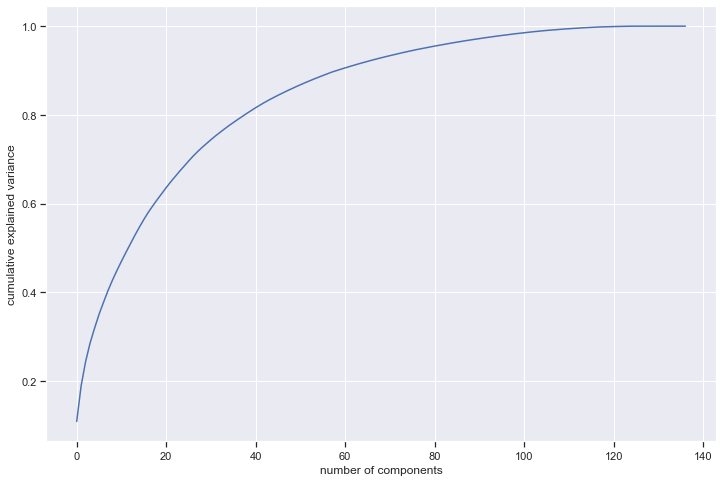

In [76]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**Looks like 58 components are enough to describe 92% of the variance in the dataset**
- We'll choose 58 components for our modeling

In [77]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=58)

In [78]:
X_train_pca = pd.DataFrame(pca_final.fit_transform(X_train))
X_train_pca.shape

(21000, 58)

In [79]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.047145557379153366 , min corr:  -0.054478107257277024


**There is indeed no correlation between the principal components.**

In [80]:
#Applying selected components to the test data - 58 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 58)

### Logistic Regression on PCA dataset:

Since we have earlier seen that the dataset is imbalanced with a very low number of churn customers, we will use appropriate class weights to handle class imbalance.

Also since identifying the churn customers is the business priority here, we can't afford missing any churn customers. So the metric for deciding model performance should be recall or sensitivity in this scenario. We need to reduce the false negatives count.

In [81]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , roc_auc_score

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_pca,y_train)

LogisticRegression(class_weight='balanced')

In [82]:
# Making prediction on the test data
y_pred = lr.predict(X_test_pca)
y_pred[:5]

array([1, 0, 0, 0, 1], dtype=int64)

In [83]:
print("Accuracy:{}".format(accuracy_score(y_test,y_pred)))

Accuracy:0.8299077880235529


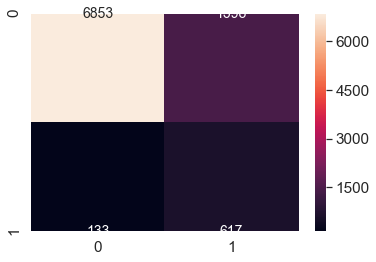

In [84]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [85]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))

Sensitivity:0.823
Specificity:0.831


In [87]:
pred_probs_test = lr.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(roc_auc_score(y_test, pred_probs_test)))

AUC:0.89


In [88]:
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

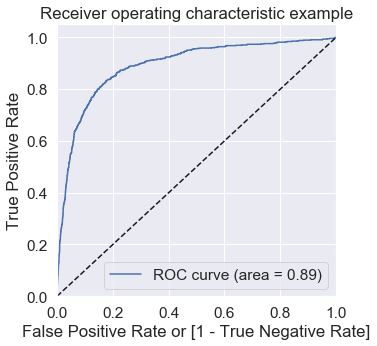

In [89]:
draw_roc(y_test, pred_probs_test)

### Decision Tree on PCA dataset:

In [90]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
dt_default = DecisionTreeClassifier(class_weight={0:0.08,1:0.92})
dt_default.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight={0: 0.08, 1: 0.92})

In [91]:
# Making predictions
y_pred = dt_default.predict(X_test_pca)

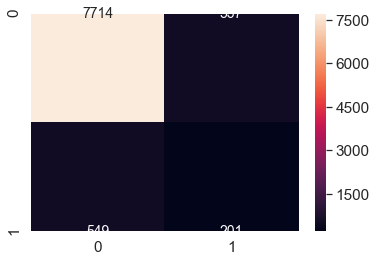

In [92]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [93]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [94]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.268
Specificity:0.935
Accuracy:0.879


We are getting very low value of sensitivity using the default model of decision tree. 

**Hyperparameter Tuning**

In [95]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight={0:0.08,1:0.92})
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,n_jobs=-1,scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   47.3s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 0.08, 1: 0.92}),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [96]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [97]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.161798,0.162572,0.010600,0.002245,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.804734,0.692308,0.786982,0.763314,0.761062,0.761680,0.038235,3
1,2.439949,0.078266,0.014001,0.006752,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.804734,0.692308,0.786982,0.763314,0.761062,0.761680,0.038235,3
2,2.219349,0.050263,0.013199,0.004021,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.798817,0.680473,0.795858,0.742604,0.775811,0.758713,0.043958,7
3,2.187397,0.085598,0.010800,0.003653,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.798817,0.680473,0.795858,0.742604,0.775811,0.758713,0.043958,7
4,3.145281,0.056018,0.012408,0.004471,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.742604,0.727811,0.671598,0.775148,0.746313,0.732694,0.034184,13


In [98]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight={0:0.1,1:0.9},max_depth=10,min_samples_leaf=100,min_samples_split=50,criterion='gini')

# Fit the grid search to the data
dtree.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=10,
                       min_samples_leaf=100, min_samples_split=50)

In [99]:
# Making predictions
y_pred = dtree.predict(X_test_pca)

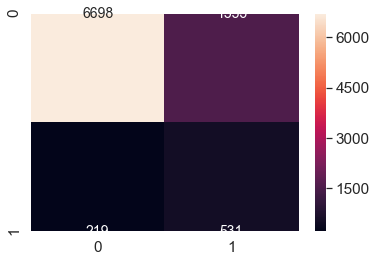

In [100]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [101]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.708
Specificity:0.812
Accuracy:0.803


In [103]:
pred_probs_test = dtree.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

AUC:0.83


We can see that the sensitivity value has significantly improved by tuning.

### Random Forest on PCA dataset:

In [104]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:0.08,1:0.92})

In [105]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight={0: 0.08, 1: 0.92})

In [106]:
# Making predictions
y_pred = rfc.predict(X_test_pca)

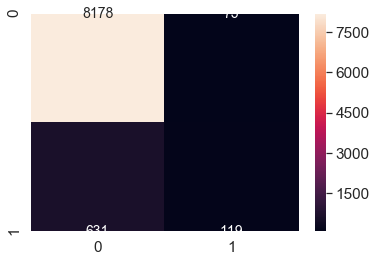

In [107]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [108]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.159
Specificity:0.991
Accuracy:0.922


In [110]:
pred_probs_test = rfc.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

AUC:0.89


**Hyperparameter Tuning**

In [112]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.08,1:0.92})
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring='recall')

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=10,
                             min_samples_leaf=300, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300,
                             class_weight={0:0.08,1:0.92})

In [ ]:
# fit
rfc.fit(X_train_pca,y_train)

In [ ]:
# Making predictions
y_pred = rfc.predict(X_test_pca)
y_pred[:5]

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, fmt='g')
plt.show()

In [ ]:
confusion = confusion_matrix(y_test,y_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

In [ ]:
pred_probs_test = rfc.predict_proba(X_test_pca)[:,1]
print("AUC:{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test)))